EXERCICE1

In [1]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Univers de discours
x_distance = np.linspace(0, 30, 301)  # 0 à 30 avec un pas de 0.1


In [3]:
# Très petite distance (v_small) - trapèze
v_small = fuzz.trapmf(x_distance, [0, 0, 3, 6])

# Petite distance (small) - triangle
small = fuzz.trimf(x_distance, [3, 6, 9])

# Distance idéale (perfect) - triangle
perfect = fuzz.trimf(x_distance, [8, 15, 22])

# Grande distance (big) - triangle
big = fuzz.trimf(x_distance, [18, 24, 27])

# Très grande distance (v_big) - trapèze
v_big = fuzz.trapmf(x_distance, [24, 27, 30, 30])


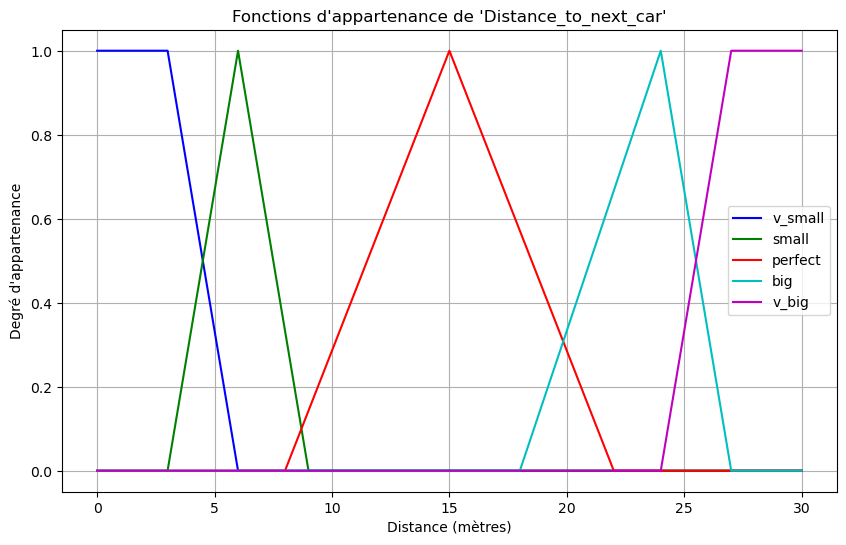

In [5]:
plt.figure(figsize=(10,6))
plt.plot(x_distance, v_small, 'b', label='v_small')
plt.plot(x_distance, small, 'g', label='small')
plt.plot(x_distance, perfect, 'r', label='perfect')
plt.plot(x_distance, big, 'c', label='big')
plt.plot(x_distance, v_big, 'm', label='v_big')
plt.title("Fonctions d'appartenance de 'Distance_to_next_car'")
plt.xlabel("Distance (mètres)")
plt.ylabel("Degré d'appartenance")
plt.legend()
plt.grid(True)
plt.show()


EXERCICE2

In [7]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Univers de discours
x_speed = np.linspace(-20, 20, 401)  # -20 à 20 avec un pas de 0.1


In [9]:
# Vitesse en diminution (declining) - trapèze
declining = fuzz.trapmf(x_speed, [-20, -20, -10, 0])

# Vitesse stable (constant) - triangle
constant = fuzz.trimf(x_speed, [-5, 0, 5])

# Vitesse en augmentation (growing) - trapèze
growing = fuzz.trapmf(x_speed, [0, 10, 20, 20])


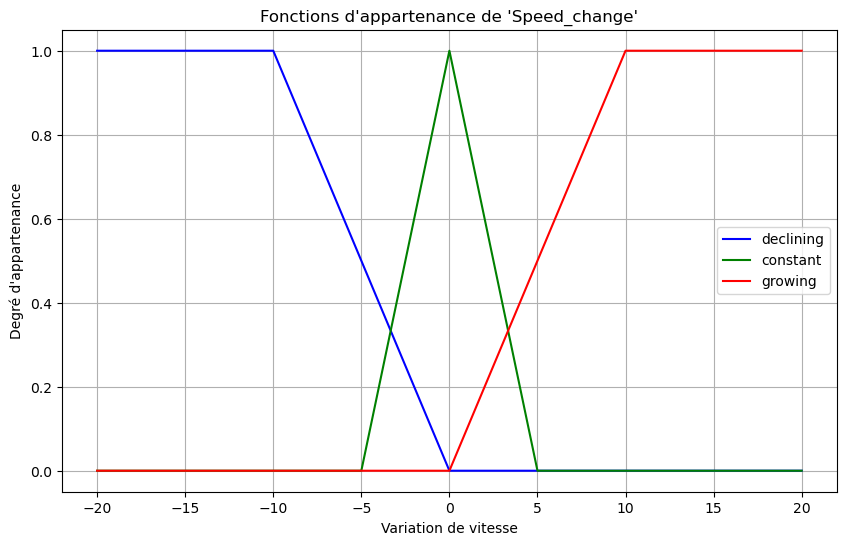

In [11]:
plt.figure(figsize=(10,6))
plt.plot(x_speed, declining, 'b', label='declining')
plt.plot(x_speed, constant, 'g', label='constant')
plt.plot(x_speed, growing, 'r', label='growing')
plt.title("Fonctions d'appartenance de 'Speed_change'")
plt.xlabel("Variation de vitesse")
plt.ylabel("Degré d'appartenance")
plt.legend()
plt.grid(True)
plt.show()


EXERCICE3

In [13]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Univers de discours
x_acc = np.linspace(-3, 3, 301)  # -3 à 3 avec un pas de 0.02


In [15]:
# Forte décélération (neg_big) - trapèze
neg_big = fuzz.trapmf(x_acc, [-3, -3, -2, -1])

# Faible décélération (neg_small) - triangle
neg_small = fuzz.trimf(x_acc, [-2, -1, 0])

# Aucune variation (zero) - triangle
zero = fuzz.trimf(x_acc, [-0.5, 0, 0.5])

# Faible accélération (pos_small) - triangle
pos_small = fuzz.trimf(x_acc, [0, 1, 2])

# Forte accélération (pos_big) - trapèze
pos_big = fuzz.trapmf(x_acc, [1, 2, 3, 3])


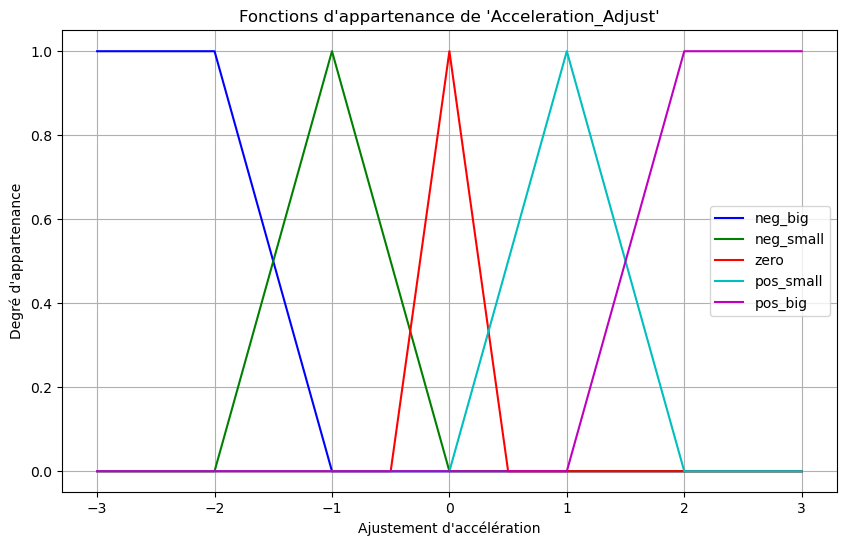

In [17]:
plt.figure(figsize=(10,6))
plt.plot(x_acc, neg_big, 'b', label='neg_big')
plt.plot(x_acc, neg_small, 'g', label='neg_small')
plt.plot(x_acc, zero, 'r', label='zero')
plt.plot(x_acc, pos_small, 'c', label='pos_small')
plt.plot(x_acc, pos_big, 'm', label='pos_big')
plt.title("Fonctions d'appartenance de 'Acceleration_Adjust'")
plt.xlabel("Ajustement d'accélération")
plt.ylabel("Degré d'appartenance")
plt.legend()
plt.grid(True)
plt.show()


EXERCICE4

In [19]:
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl
import matplotlib.pyplot as plt

# Variables d'entrée
distance = ctrl.Antecedent(np.linspace(0,30,301), 'Distance_to_next_car')
speed = ctrl.Antecedent(np.linspace(-20,20,401), 'Speed_change')

# Variable de sortie
acc = ctrl.Consequent(np.linspace(-3,3,301), 'Acceleration_Adjust')

# Fonctions d'appartenance Distance_to_next_car
distance['v_small'] = fuzz.trapmf(distance.universe, [0,0,3,6])
distance['small']   = fuzz.trimf(distance.universe, [3,6,9])
distance['perfect'] = fuzz.trimf(distance.universe, [8,15,22])
distance['big']     = fuzz.trimf(distance.universe, [18,24,27])
distance['v_big']   = fuzz.trapmf(distance.universe, [24,27,30,30])

# Fonctions d'appartenance Speed_change
speed['declining'] = fuzz.trapmf(speed.universe, [-20,-20,-10,0])
speed['constant']  = fuzz.trimf(speed.universe, [-5,0,5])
speed['growing']   = fuzz.trapmf(speed.universe, [0,10,20,20])

# Fonctions d'appartenance Acceleration_Adjust
acc['neg_big']   = fuzz.trapmf(acc.universe, [-3,-3,-2,-1])
acc['neg_small'] = fuzz.trimf(acc.universe, [-2,-1,0])
acc['zero']      = fuzz.trimf(acc.universe, [-0.5,0,0.5])
acc['pos_small'] = fuzz.trimf(acc.universe, [0,1,2])
acc['pos_big']   = fuzz.trapmf(acc.universe, [1,2,3,3])


In [21]:
rules = [
    ctrl.Rule(distance['v_small'] & speed['declining'], acc['neg_small']),
    ctrl.Rule(distance['v_small'] & speed['constant'], acc['neg_big']),
    ctrl.Rule(distance['v_small'] & speed['growing'], acc['neg_big']),
    
    ctrl.Rule(distance['small'] & speed['declining'], acc['zero']),
    ctrl.Rule(distance['small'] & speed['constant'], acc['neg_small']),
    ctrl.Rule(distance['small'] & speed['growing'], acc['neg_big']),
    
    ctrl.Rule(distance['perfect'] & speed['declining'], acc['pos_small']),
    ctrl.Rule(distance['perfect'] & speed['constant'], acc['zero']),
    ctrl.Rule(distance['perfect'] & speed['growing'], acc['neg_small']),
    
    ctrl.Rule(distance['big'] & speed['declining'], acc['pos_big']),
    ctrl.Rule(distance['big'] & speed['constant'], acc['pos_small']),
    ctrl.Rule(distance['big'] & speed['growing'], acc['zero']),
    
    ctrl.Rule(distance['v_big'] & speed['declining'], acc['pos_big']),
    ctrl.Rule(distance['v_big'] & speed['constant'], acc['pos_big']),
    ctrl.Rule(distance['v_big'] & speed['growing'], acc['pos_small']),
]


Valeur de sortie Acceleration_Adjust : 0.566


C:\Anaconda\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


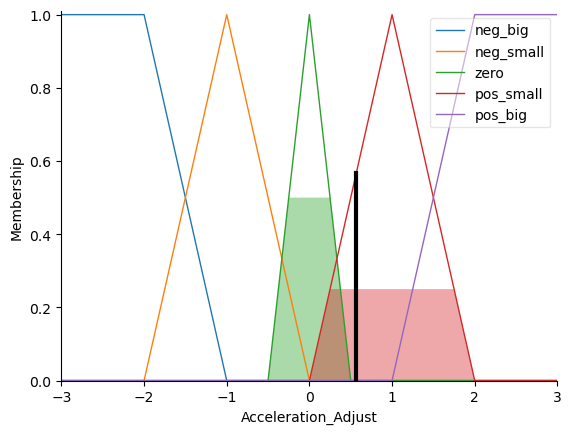

In [23]:
# Système de contrôle
acc_ctrl = ctrl.ControlSystem(rules)
acc_sim  = ctrl.ControlSystemSimulation(acc_ctrl)

# Valeurs d'entrée à tester
acc_sim.input['Distance_to_next_car'] = 13
acc_sim.input['Speed_change'] = -2.5

# Calculer la sortie
acc_sim.compute()

# Afficher le résultat numérique
print(f"Valeur de sortie Acceleration_Adjust : {acc_sim.output['Acceleration_Adjust']:.3f}")

# Visualiser graphiquement la défluzzification
acc.view(sim=acc_sim)


TP2LF

In [25]:
import numpy as np
import pandas as pd

# Générer aléatoirement les entrées
np.random.seed(42)  # pour reproductibilité
n_samples = 1000

distance_samples = np.random.uniform(0, 30, n_samples)
speed_samples    = np.random.uniform(-20, 20, n_samples)

# Calculer la sortie à l'aide du système flou
acc_samples = []

for d, s in zip(distance_samples, speed_samples):
    acc_sim.input['Distance_to_next_car'] = d
    acc_sim.input['Speed_change'] = s
    acc_sim.compute()
    acc_samples.append(acc_sim.output['Acceleration_Adjust'])

# Créer le DataFrame
df = pd.DataFrame({
    'Distance_to_next_car': distance_samples,
    'Speed_change': speed_samples,
    'Acceleration_Adjust': acc_samples
})

df.head()


,Distance_to_next_car,Speed_change,Acceleration_Adjust
0,11.236204,-12.594683,1.000000
1,28.521429,1.676038,1.948763
2,21.959818,14.917833,-0.023863
3,17.959755,9.288995,-1.000000
4,4.680559,12.262446,-2.132444


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Séparer les features et la cible
X = df[['Distance_to_next_car', 'Speed_change']]
y = df['Acceleration_Adjust']

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraîner le modèle
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Prédictions
y_pred = rf_model.predict(X_test)


In [29]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Erreur absolue moyenne (MAE) : {mae:.3f}")
print(f"Erreur quadratique moyenne (MSE) : {mse:.3f}")


Erreur absolue moyenne (MAE) : 0.022
Erreur quadratique moyenne (MSE) : 0.003


La logique floue et le machine learning présentent chacun des avantages spécifiques pour la régulation de l’accélération d’un véhicule. La logique floue se distingue par son niveau d’explicabilité élevé : les règles qui déterminent le comportement du système sont compréhensibles et interprétables par un humain, ce qui facilite l’analyse et l’ajustement du système. De plus, elle ne nécessite pas de grandes quantités de données historiques pour fonctionner, car elle repose sur des connaissances expertes formalisées sous forme de règles et de fonctions d’appartenance. En revanche, la logique floue peut être moins précise si les règles sont approximatives ou mal calibrées, et le réglage des fonctions d’appartenance reste souvent manuel.

Le machine learning, en revanche, excelle en termes de précision prédictive, car il peut apprendre automatiquement des relations complexes et non linéaires à partir des données. Il s’adapte facilement à de nouvelles situations grâce à l’entraînement sur de grands ensembles de données. Cependant, cette approche est souvent moins explicable : il est difficile de comprendre exactement pourquoi le modèle prédit telle valeur pour une entrée donnée. De plus, elle dépend de la disponibilité et de la qualité des données pour atteindre de bonnes performances.